# Student Bayes Net

Bayesian Belief Network or Bayesian Network or Belief Network is a Probabilistic Graphical Model (PGM) that represents conditional dependencies between random variables through a Directed Acyclic Graph (DAG).Bayesian Networks are applied in many fields. For example, disease diagnosis, optimized web search, spam filtering, gene regulatory networks, etc.

We will build a Students Bayes network.

<img src="student_net.png" width=50% />

In [2]:
# !pip install pgmpy
# !pip install daft

In [4]:
import pylab as plt
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD

OSError: [WinError 126] The specified module could not be found. Error loading "C:\Users\nuke2\miniconda3\lib\site-packages\torch\lib\torch_python.dll" or one of its dependencies.

## A - Set up the model

### 1. Set the structure

In [3]:
# Defining the model structure. We can define the network by just passing a list of edges.
model = BayesianNetwork([('D', 'G'), ('I', 'G'), ('G', 'L'), ('I', 'S')])

<Axes:>

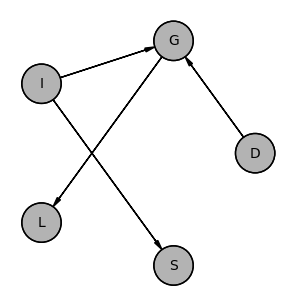

In [40]:
model.to_daft('circular',latex=False,pgm_params={'grid_unit': 3, 'node_unit':1}).render()

###  2.Set up the relationships (the CPDs)

In [5]:
# Defining individual CPDs.
cpd_d = TabularCPD(variable='D', variable_card=2, values=[[0.6], [0.4]], state_names={'D': ['Easy', 'Hard']})
cpd_i = TabularCPD(variable='I', variable_card=2, values=[[0.7], [0.3]], state_names={'I': ['Dumb', 'Intelligent']})

In [6]:
print(cpd_d)

+---------+-----+
| D(Easy) | 0.6 |
+---------+-----+
| D(Hard) | 0.4 |
+---------+-----+


In [7]:
print(cpd_i)

+----------------+-----+
| I(Dumb)        | 0.7 |
+----------------+-----+
| I(Intelligent) | 0.3 |
+----------------+-----+


In [8]:
# The representation of CPD in pgmpy is a bit different than the CPD shown in the above picture. In pgmpy the colums
# are the evidences and rows are the states of the variable. So the grade CPD is represented like this:
#
#    +---------+---------+---------+---------+---------+
#    | diff    | intel_0 | intel_0 | intel_1 | intel_1 |
#    +---------+---------+---------+---------+---------+
#    | intel   | diff_0  | diff_1  | diff_0  | diff_1  |
#    +---------+---------+---------+---------+---------+
#    | grade_0 | 0.3     | 0.05    | 0.9     | 0.5     |
#    +---------+---------+---------+---------+---------+
#    | grade_1 | 0.4     | 0.25    | 0.08    | 0.3     |
#    +---------+---------+---------+---------+---------+
#    | grade_2 | 0.3     | 0.7     | 0.02    | 0.2     |
#    +---------+---------+---------+---------+---------+

In [9]:
cpd_g = TabularCPD(variable='G', variable_card=3, 
                   values=[[0.3, 0.05, 0.9,  0.5],
                           [0.4, 0.25, 0.08, 0.3],
                           [0.3, 0.7,  0.02, 0.2]],
                  evidence=['I', 'D'],
                  evidence_card=[2, 2],
                  state_names={'G': ['A', 'B', 'C'],
                               'I': ['Dumb', 'Intelligent'],
                               'D': ['Easy', 'Hard']})


cpd_l = TabularCPD(variable='L', variable_card=2, 
                   values=[[0.1, 0.4, 0.99],
                           [0.9, 0.6, 0.01]],
                   evidence=['G'],
                   evidence_card=[3],
                   state_names={'L': ['Bad', 'Good'],
                                'G': ['A', 'B', 'C']})

cpd_s = TabularCPD(variable='S', variable_card=2,
                   values=[[0.95, 0.2],
                           [0.05, 0.8]],
                   evidence=['I'],
                   evidence_card=[2],
                   state_names={'S': ['Bad', 'Good'],
                                'I': ['Dumb', 'Intelligent']})

In [10]:
print(cpd_l)

+---------+------+------+------+
| G       | G(A) | G(B) | G(C) |
+---------+------+------+------+
| L(Bad)  | 0.1  | 0.4  | 0.99 |
+---------+------+------+------+
| L(Good) | 0.9  | 0.6  | 0.01 |
+---------+------+------+------+


In [11]:
print(cpd_s)

+---------+---------+----------------+
| I       | I(Dumb) | I(Intelligent) |
+---------+---------+----------------+
| S(Bad)  | 0.95    | 0.2            |
+---------+---------+----------------+
| S(Good) | 0.05    | 0.8            |
+---------+---------+----------------+


In [12]:
print(cpd_g)

+------+---------+---------+----------------+----------------+
| I    | I(Dumb) | I(Dumb) | I(Intelligent) | I(Intelligent) |
+------+---------+---------+----------------+----------------+
| D    | D(Easy) | D(Hard) | D(Easy)        | D(Hard)        |
+------+---------+---------+----------------+----------------+
| G(A) | 0.3     | 0.05    | 0.9            | 0.5            |
+------+---------+---------+----------------+----------------+
| G(B) | 0.4     | 0.25    | 0.08           | 0.3            |
+------+---------+---------+----------------+----------------+
| G(C) | 0.3     | 0.7     | 0.02           | 0.2            |
+------+---------+---------+----------------+----------------+


In [13]:
# Associating the CPDs with the network
model.add_cpds(cpd_d, cpd_i, cpd_g, cpd_l, cpd_s)

# check_model checks for the network structure and CPDs and verifies that the CPDs are correctly 
# defined and sum to 1.
model.check_model()

True

### 3. Add relationships to the model

In [14]:
model.add_cpds(cpd_d,cpd_i,cpd_g, cpd_s, cpd_l)

### 4. Examine the structure of your graph

In [15]:
model.get_cardinality('G')

3

In [16]:
model.get_cardinality('L')

2

In [17]:
model.get_cardinality('S')

2

In [18]:
model.get_cpds()

[<TabularCPD representing P(D:2) at 0x1d39106d490>,
 <TabularCPD representing P(I:2) at 0x1d39106d520>,
 <TabularCPD representing P(G:3 | I:2, D:2) at 0x1d3bd080040>,
 <TabularCPD representing P(L:2 | G:3) at 0x1d3bd080b80>,
 <TabularCPD representing P(S:2 | I:2) at 0x1d3bd080e50>]

### 5. Find active trail nodes

Two nodes (variables) in a Bayes net are on an active trail if a change in one node affects the other. This includes cases where the two nodes have a causal relationship, an evidential relationship, or have some common cause.

In [19]:
#path of influence
model.active_trail_nodes('G')

{'G': {'D', 'G', 'I', 'L', 'S'}}

In [20]:
model.active_trail_nodes('I')

{'I': {'G', 'I', 'L', 'S'}}

In [21]:
model.active_trail_nodes('D')

{'D': {'D', 'G', 'L'}}

In [22]:
model.active_trail_nodes('D', observed='G')

{'D': {'D', 'I', 'S'}}

### 6. Find local independencies

In [23]:
model.local_independencies('G')

(G ⟂ S | D, I)

In [24]:
model.local_independencies('I')

(I ⟂ D)

### 7. Get all independencies

In [25]:
model.get_independencies()

(D ⟂ S, I)
(D ⟂ I | S)
(D ⟂ S | I)
(D ⟂ L | G)
(D ⟂ L | S, G)
(D ⟂ S | L, I)
(D ⟂ S, L | G, I)
(D ⟂ L | S, I, G)
(D ⟂ S | L, I, G)
(S ⟂ D)
(S ⟂ D, L, G | I)
(S ⟂ L | G)
(S ⟂ L, G | D, I)
(S ⟂ L | D, G)
(S ⟂ D, G | L, I)
(S ⟂ D, L | G, I)
(S ⟂ G | D, L, I)
(S ⟂ L | D, G, I)
(S ⟂ D | L, I, G)
(I ⟂ D)
(I ⟂ D | S)
(I ⟂ L | G)
(I ⟂ L | S, G)
(I ⟂ L | D, G)
(I ⟂ L | D, S, G)
(G ⟂ S | I)
(G ⟂ S | D, I)
(G ⟂ S | L, I)
(G ⟂ S | D, L, I)
(L ⟂ D, S, I | G)
(L ⟂ S | I)
(L ⟂ D, I | S, G)
(L ⟂ S, I | D, G)
(L ⟂ S | D, I)
(L ⟂ D, S | G, I)
(L ⟂ I | D, S, G)
(L ⟂ D | S, I, G)
(L ⟂ S | D, G, I)

## B - Making inferences

### 1. Marginal Inference 

Finding the probability distribution of a specific variable. 

For instance, given a graph with variables A, B, C, and D, where A takes values 1, 2, and 3, find p(A=1), p(A=2) and p(A=3).

In [26]:
infer = VariableElimination(model)

In [27]:
prob_letter = infer.query(variables = ['L'])
print(prob_letter)

+---------+----------+
| L       |   phi(L) |
+=========+==========+
| L(Bad)  |   0.4977 |
+---------+----------+
| L(Good) |   0.5023 |
+---------+----------+


In [28]:
g_dist = infer.query(['G'])
print(g_dist)

+------+----------+
| G    |   phi(G) |
+======+==========+
| G(A) |   0.3620 |
+------+----------+
| G(B) |   0.2884 |
+------+----------+
| G(C) |   0.3496 |
+------+----------+


## Posterior inference: 

Given some observed variables $v_E$ (E for evidence) that take values e, finding the posterior distribution $p(v_H | v_E=e)$ for some hidden variables $v_H$.


### Probability Queries

We could use a joint probability distribution over multiple random variables to answer queries of interest. Perhaps the most common query probability query type is the probability query. Such a query consists ofwo parts:

* evidence :  a subset $E$ of random variables in the model, and an instantiation $e$ to these
* the query variables: a subset $Y$ of random variables in the network.

Our task is to compute
$P(Y| E = e)$
that is, the posterior probability distribution over the values $y$ of $Y$ , conditioned on the fact that
distribution $E = e$. This expression can also be viewed as the marginal over $Y$ , in the distribution we
obtain by conditioning on $e$.

### 2a. Causal Reasoning

In [29]:
prob_letter_good_grade = infer.query(variables = ['L'], evidence = {'G':'A'})
print(prob_letter_good_grade)

+---------+----------+
| L       |   phi(L) |
+=========+==========+
| L(Bad)  |   0.1000 |
+---------+----------+
| L(Good) |   0.9000 |
+---------+----------+


In [30]:
prob_grade_high_intelligence = infer.query(variables = ['G'], 
                evidence={'D': 'Easy', 'I': 'Intelligent'})
print(prob_grade_high_intelligence)

+------+----------+
| G    |   phi(G) |
+======+==========+
| G(A) |   0.9000 |
+------+----------+
| G(B) |   0.0800 |
+------+----------+
| G(C) |   0.0200 |
+------+----------+


In [31]:
prob_letter_good_grade_bad_sat = infer.query(
                                        variables = ['L'], 
                                        evidence = {'G':'A', 'S':'Bad'})
print(prob_letter_good_grade_bad_sat)

+---------+----------+
| L       |   phi(L) |
+=========+==========+
| L(Bad)  |   0.1000 |
+---------+----------+
| L(Good) |   0.9000 |
+---------+----------+


### 2b. Evidential Reasoning

#### What can evidence can tell us  about the  probabilities of causal variables.

In [32]:
prob_high_intel_if_strong_letter  = infer.query(
                                        variables = ['I'], 
                                        evidence = {'L':'Good'})
print(prob_high_intel_if_strong_letter)

+----------------+----------+
| I              |   phi(I) |
+================+==========+
| I(Dumb)        |   0.5415 |
+----------------+----------+
| I(Intelligent) |   0.4585 |
+----------------+----------+


In [33]:
prob_high_intel_if_strong_letter_diff_class  = infer.query(
                                        variables = ['I'], 
                                        evidence = {'L':'Good', 'D' : 'Hard'})
print(prob_high_intel_if_strong_letter)

+----------------+----------+
| I              |   phi(I) |
+================+==========+
| I(Dumb)        |   0.5415 |
+----------------+----------+
| I(Intelligent) |   0.4585 |
+----------------+----------+


## Map Queries

Finding a high-probability joint assignment to some subset of variables. 

Maximum-a-posteriori (MAP) inference: 

Given some observed variables $v_E$ that take values $e$, finding the setting of other variables $v_H$ that have the highest probability.

The simplest variant of this type of task is the MAP query (also called MAP assignment most probable explanation (MPE)), whose aim is to find the MAP assignment — the most likely assignment to all of the (non-evidence) variables. 

More precisely, if we let $W = X - E$, our task is to find the most likely assignment to the variables in W given the evidence $E = e$

$$MAP(W | e) = arg max_w P(w, e)$$

where, in general, $argmax_x f(x)$ represents the value of $x$ for which $f(x)$ is maximal. 

Note that there might be more than one assignment that has the highest posterior probability. In this case, we can either decide that the MAP task is to return the set of possible assignments, or to return an arbitrary member of that set.It is important to understand the difference

#### We can find out the most probable state for a variable

In [34]:
infer.map_query(variables = ['L'])

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

{'L': 'Good'}

In [35]:
infer.map_query(variables = ['G'])

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

{'G': 'A'}

In [36]:
infer.map_query(variables = ['S','G'], evidence = {'I' :'Intelligent'})

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

{'S': 'Good', 'G': 'A'}